# Building an Image Classifier Using the Sequential API

### Using Keras to load the dataset

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.2.0'

In [3]:
keras.__version__

'2.3.0-tf'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

### Split into a training set and test set, and scale the input features

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

### Labels

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
class_names[y_train[0]]

'Coat'

### Creating the model using the Sequential API

In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

### Summary of the model

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### Layers information

In [12]:
model.layers

In [13]:
hidden1 = model.layers[1]

In [14]:
hidden1.name

'dense'

In [15]:
model.get_layer('dense') is hidden1

True

In [16]:
weights, biases = hidden1.get_weights()
weights

array([[-0.01629128, -0.06378061,  0.05373098, ...,  0.06370498,
        -0.06928469, -0.06260613],
       [ 0.01654326,  0.02907914,  0.01739112, ...,  0.01763875,
        -0.01907836,  0.07342431],
       [-0.03889589,  0.02132241, -0.07285558, ...,  0.04323953,
         0.00474919, -0.02606719],
       ...,
       [-0.00450433, -0.02070056, -0.07084598, ..., -0.03759247,
         0.05796532,  0.00067139],
       [ 0.07151376,  0.01577291,  0.05396974, ...,  0.07235214,
        -0.03916637, -0.03845256],
       [-0.01686285,  0.02322412, -0.05589483, ...,  0.06456889,
         0.06641409,  0.0236372 ]], dtype=float32)

In [17]:
weights.shape

(784, 300)

In [18]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
biases.shape

(300,)

### Compiling the model

In [20]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### Training and evaluating the model

In [21]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7089 - accuracy: 0.7665 - val_loss: 0.5222 - val_accuracy: 0.8222
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4850 - accuracy: 0.8303 - val_loss: 0.4411 - val_accuracy: 0.8496
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4413 - accuracy: 0.8447 - val_loss: 0.4108 - val_accuracy: 0.8586
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4146 - accuracy: 0.8559 - val_loss: 0.3987 - val_accuracy: 0.8640
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3947 - accuracy: 0.8632 - val_loss: 0.4158 - val_accuracy: 0.8572
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3785 - accuracy: 0.8663 - val_loss: 0.3737 - val_accuracy: 0.8724
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3654 - accuracy: 0.8714 - val_loss: 0.3966 - val_accuracy:

### History training

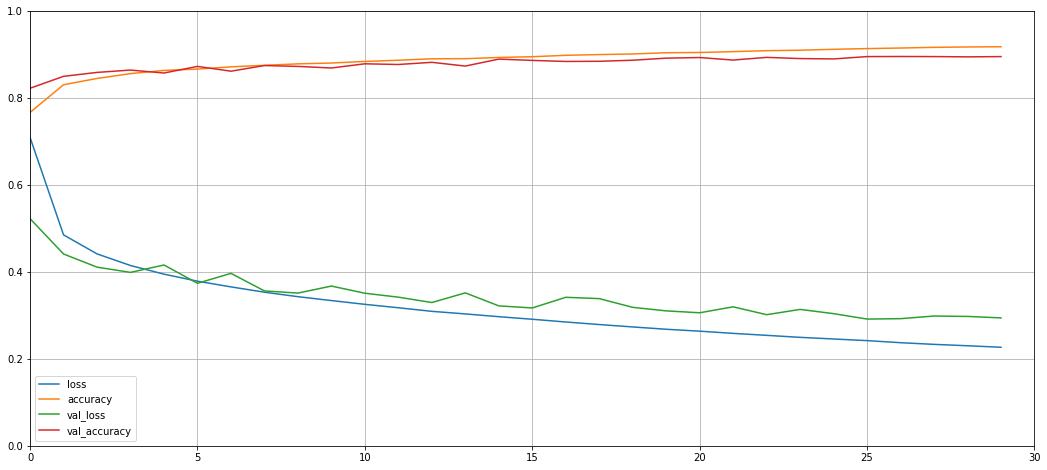

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(18, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.gca().set_xlim(0, 30)
plt.show()

### Evaluate model

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 721us/step - loss: 0.3259 - accuracy: 0.8844


[0.32592058181762695, 0.8844000101089478]

### Using the model to make predictions

In [24]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [25]:
import numpy as np

y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [26]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

# Building a Regression MLP Using the Sequential API

### Preparing Data

In [27]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

### Buildding Sequential API

In [28]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='sgd')

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 787us/step - loss: 1.2954 - val_loss: 0.4918
Epoch 2/20
363/363 [==============================] - 0s 697us/step - loss: 0.4595 - val_loss: 0.4474
Epoch 3/20
363/363 [==============================] - 0s 698us/step - loss: 0.4689 - val_loss: 0.4621
Epoch 4/20
363/363 [==============================] - 0s 709us/step - loss: 0.4287 - val_loss: 0.4175
Epoch 5/20
363/363 [==============================] - 0s 703us/step - loss: 0.4358 - val_loss: 0.4500
Epoch 6/20
363/363 [==============================] - 0s 685us/step - loss: 0.4114 - val_loss: 0.4088
Epoch 7/20
363/363 [==============================] - 0s 699us/step - loss: 0.3919 - val_loss: 0.4002
Epoch 8/20
363/363 [==============================] - 0s 687us/step - loss: 0.3909 - val_loss: 0.4055
Epoch 9/20
363/363 [==============================] - 0s 688us/step - loss: 0.3851 - val_loss: 0.3940
Epoch 10/20
363/363 [==============================] - 0s 684us/step - loss: 0.383

# Building Complex Models Using the Functional API

### Wide Deep neural network

In [29]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

model.compile(loss='mean_squared_error', optimizer='sgd')

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 867us/step - loss: 0.7805 - val_loss: 0.9266
Epoch 2/20
363/363 [==============================] - 0s 734us/step - loss: 1.6525 - val_loss: 0.5069
Epoch 3/20
363/363 [==============================] - 0s 751us/step - loss: 54.9715 - val_loss: 0.6115
Epoch 4/20
363/363 [==============================] - 0s 751us/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 0s 738us/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 0s 738us/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 0s 755us/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 0s 734us/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 0s 736us/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 0s 764us/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 

### Handling multiple inputs

In [30]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 0s 904us/step - loss: 2.0491 - val_loss: 0.9172
Epoch 2/20
363/363 [==============================] - 0s 788us/step - loss: 0.7908 - val_loss: 0.7241
Epoch 3/20
363/363 [==============================] - 0s 790us/step - loss: 0.6717 - val_loss: 0.6623
Epoch 4/20
363/363 [==============================] - 0s 788us/step - loss: 0.6245 - val_loss: 0.6272
Epoch 5/20
363/363 [==============================] - 0s 790us/step - loss: 0.5964 - val_loss: 0.6003
Epoch 6/20
363/363 [==============================] - 0s 800us/step - loss: 0.5751 - val_loss: 0.5807
Epoch 7/20
363/363 [==============================] - 0s 822us/step - loss: 0.5596 - val_loss: 0.5647
Epoch 8/20
363/363 [==============================] - 0s 791us/step - loss: 0.5468 - val_loss: 0.5526
Epoch 9/20
363/363 [==============================] - 0s 786us/step - loss: 0.5370 - val_loss: 0.5435
Epoch 10/20
363/363 [==============================] - 0s 789us/step - loss: 0.529

### Handling multiple outputs

In [31]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 1.1287 - output_loss: 1.0107 - aux_output_loss: 2.1907 - val_loss: 0.6869 - val_output_loss: 0.6133 - val_aux_output_loss: 1.3492
Epoch 2/20
363/363 [==============================] - 0s 903us/step - loss: 1.0399 - output_loss: 0.9788 - aux_output_loss: 1.5900 - val_loss: 0.5885 - val_output_loss: 0.5277 - val_aux_output_loss: 1.1352
Epoch 3/20
363/363 [==============================] - 0s 903us/step - loss: 0.5626 - output_loss: 0.5067 - aux_output_loss: 1.0658 - val_loss: 0.5403 - val_output_loss: 0.4907 - val_aux_output_loss: 0.9865
Epoch 4/20
363/363 [==============================] - 0s 892us/step - loss: 0.5176 - output_loss: 0.4711 - aux_output_loss: 0.9357 - val_loss: 0.5037 - val_output_loss: 0.4628 - val_aux_output_loss: 0.8713
Epoch 5/20
363/363 [==============================] - 0s 896us/step - loss: 0.4849 - output_loss: 0.4459 - aux_output_loss: 0.8359 - val_loss: 0.4785 - val_output_loss: 0.4451 - 

# Using the Subclassing API to Build Dynamic Models

In [32]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

In [33]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 2.3977 - output_1_loss: 2.2885 - output_2_loss: 3.3813 - val_loss: 1.1305 - val_output_1_loss: 0.9995 - val_output_2_loss: 2.3096
Epoch 2/10
363/363 [==============================] - 0s 906us/step - loss: 1.0485 - output_1_loss: 0.9407 - output_2_loss: 2.0193 - val_loss: 0.8703 - val_output_1_loss: 0.7790 - val_output_2_loss: 1.6916
Epoch 3/10
363/363 [==============================] - 0s 901us/step - loss: 0.8021 - output_1_loss: 0.7171 - output_2_loss: 1.5670 - val_loss: 0.7636 - val_output_1_loss: 0.6910 - val_output_2_loss: 1.4172
Epoch 4/10
363/363 [==============================] - 0s 906us/step - loss: 0.7261 - output_1_loss: 0.6532 - output_2_loss: 1.3822 - val_loss: 0.7127 - val_output_1_loss: 0.6481 - val_output_2_loss: 1.2945
Epoch 5/10
363/363 [==============================] - 0s 902us/step - loss: 0.6871 - output_1_loss: 0.6195 - output_2_loss: 1.2953 - val_loss: 0.6846 - val_output_1_loss: 0.6231 

# Saving and Restoring a Model

In [34]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [35]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 857us/step - loss: 2.4858 - val_loss: 1.1641
Epoch 2/10
363/363 [==============================] - 0s 744us/step - loss: 0.8902 - val_loss: 0.7752
Epoch 3/10
363/363 [==============================] - 0s 746us/step - loss: 0.7072 - val_loss: 0.6867
Epoch 4/10
363/363 [==============================] - 0s 743us/step - loss: 0.6461 - val_loss: 0.6432
Epoch 5/10
363/363 [==============================] - 0s 741us/step - loss: 0.6096 - val_loss: 0.6124
Epoch 6/10
363/363 [==============================] - 0s 740us/step - loss: 0.5826 - val_loss: 0.5915
Epoch 7/10
363/363 [==============================] - 0s 741us/step - loss: 0.5611 - val_loss: 0.5704
Epoch 8/10
363/363 [==============================] - 0s 747us/step - loss: 0.5432 - val_loss: 0.5543
Epoch 9/10
363/363 [==============================] - 0s 737us/step - loss: 0.5278 - val_loss: 0.5409
Epoch 10/10
162/162 [==============================] - 0s 459us/step - loss: 0.520

In [36]:
model.save("my_keras_model.h5")

In [37]:
model = keras.models.load_model("my_keras_model.h5")

In [38]:
model.predict(X_new)

array([[1.8896794],
       [1.5934448],
       [3.7622082]], dtype=float32)

In [39]:
model.save_weights("my_keras_weights.ckpt")

In [40]:
model.load_weights("my_keras_weights.ckpt")